In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'activities.csv'
df = pd.read_csv(file_path)

In [2]:
df.shape

(102, 87)

In [3]:
# Remove outliers based on 'Distance' and 'Elapsed Time'
# df = df[df['Distance'] < 42]  # Assuming marathons are outliers
# df = df[df['Elapsed Time'] < 180]  # Assuming 3 hours is a cutoff for extraordinary long runs

# df = df[(df['Speed Min/Km'] >= 4) & (df['Speed Min/Km'] <= 10)]  # Speed range 4min/km to 10min/km
# df = df[df['Average Heart Rate'] <= 190]  # Assuming heart rate above 190 bpm is an outlier


In [4]:
# Convert 'Activity Date' to a datetime format
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

# Apply filters one by one to see which one is causing the DataFrame to empty
df_running = df[df['Activity Type'] == 'Run']
df_running_2023 = df_running[df_running['Activity Date'].dt.year == 2023]

df.shape

(102, 87)

In [5]:
df = df[df['Distance'] > 0]

# Convert 'Elapsed Time' to minutes and 'Distance' to kilometers
df['Elapsed Time'] = df['Elapsed Time'] / 60
# df['Distance'] = df['Distance'] / 1000


# Calculate speed in minutes per kilometer
df['Speed Min/Km'] = df['Elapsed Time'] / df['Distance']

# df.shape
df['Speed Min/Km']
# df['Elapsed Time']
# df['Distance']

0       6.982201
1       6.431718
2       5.416667
3       5.475040
4       5.548246
         ...    
96     11.659436
97      7.810374
98      7.021350
99      7.011893
101     7.832963
Name: Speed Min/Km, Length: 100, dtype: float64

In [6]:
# Filter out data to remove more outliers for speed and heart rate
# df = df[(df['Speed Min/Km'] >= 4) & (df['Speed Min/Km'] <= 10)]  # Speed range 4min/km to 10min/km
# df = df[df['Average Heart Rate'] <= 190]  # Assuming heart rate above 190 bpm is an outlier

# Convert 'Activity Date' to a datetime format
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

# Now you can use the .dt accessor to extract the week number
df['Week'] = df['Activity Date'].dt.isocalendar().week
df['Month'] = df['Activity Date'].dt.month

df.shape

(100, 90)

In [7]:
# Create visualizations
# Weighted average speed by month
monthly_speed_sum = df.groupby('Month')['Speed Min/Km'].sum()
monthly_activity_count = df.groupby('Month')['Activity ID'].count()
weighted_avg_speed_by_month = monthly_speed_sum / monthly_activity_count

# Weighted average heart rate by month
monthly_hr_sum = df.groupby('Month')['Average Heart Rate'].sum()
weighted_avg_hr_by_month = monthly_hr_sum / monthly_activity_count

# Convert month numbers to names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
weighted_avg_speed_by_month_names = {month_names[k]: v for k, v in weighted_avg_speed_by_month.items()}
weighted_avg_hr_by_month_names = {month_names[k]: v for k, v in weighted_avg_hr_by_month.items()}

df.shape

(100, 90)

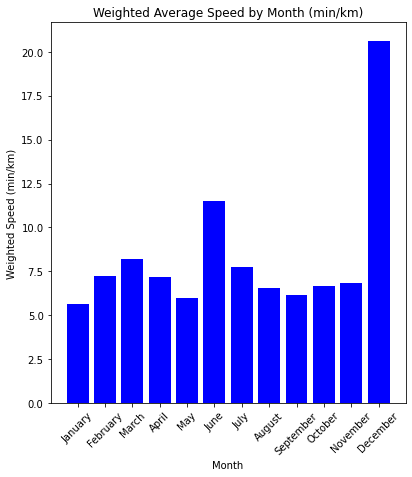

In [8]:
# Plot weighted average speed by month
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(weighted_avg_speed_by_month_names.keys(), weighted_avg_speed_by_month_names.values(), color='blue')
plt.title('Weighted Average Speed by Month (min/km)')
plt.xlabel('Month')
plt.ylabel('Weighted Speed (min/km)')
plt.xticks(rotation=45)
plt.show()

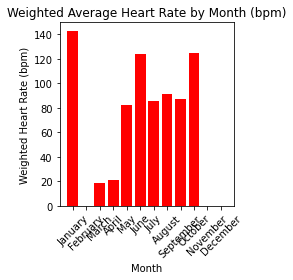

In [9]:
# Plot weighted average heart rate by month
plt.subplot(1, 2, 2)
plt.bar(weighted_avg_hr_by_month_names.keys(), weighted_avg_hr_by_month_names.values(), color='red')
plt.title('Weighted Average Heart Rate by Month (bpm)')
plt.xlabel('Month')
plt.ylabel('Weighted Heart Rate (bpm)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

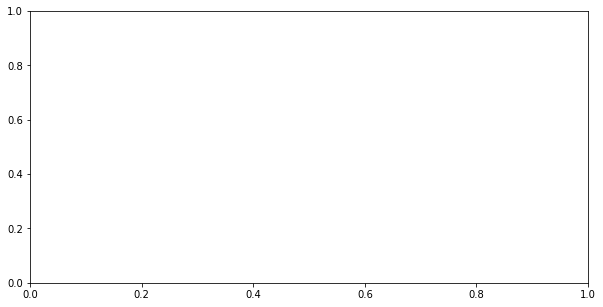

In [10]:
# Ensure 'Week' is a column and the DataFrame is sorted by date
df_july_onwards = df[df['Activity Date'].dt.month >= 7].copy()
df_july_onwards['Week'] = df_july_onwards['Activity Date'].dt.isocalendar().week

# Calculate the cumulative distance for each week
df_july_onwards['Cumulative Distance'] = df_july_onwards.groupby('Week')['Distance'].cumsum()

# Since we want to plot the cumulative distance at the end of each week,
# we need to get the last cumulative distance for each week
weekly_cumulative = df_july_onwards.groupby('Week')['Cumulative Distance'].last().reset_index()

# Plot cumulative distance by week
plt.figure(figsize=(10, 5))
plt.plot(weekly_cumulative['Week'], weekly_cumulative['Cumulative Distance'], marker='o', color='green')
plt.title('Cumulative Distance by Week from July 2023')
plt.xlabel('Week Number')
plt.ylabel('Cumulative Distance (km)')
plt.grid(True)
plt.xticks(range(weekly_cumulative['Week'].min(), weekly_cumulative['Week'].max()+1))  # Set x-ticks to show every week number
plt.show()
